## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [5]:
student_df = pd.read_csv("students-data.csv",delimiter = ";")

In [6]:
student_df.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [10]:
#Setting index name to 'number'
student_df.index.name = 'number'
student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
#Check if missing values are there
student_df.isnull().values.any()

False

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [16]:
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [18]:
#attribute names which are not numerical
student_df.select_dtypes(exclude='number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [19]:
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [36]:
studentNew_df = student_df.drop(student_df.var()[student_df.var() < 1].index.values, axis=1)

In [23]:
#student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [37]:
studentNew_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [38]:
studentNew_df.select_dtypes(exclude='number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
studentNew_df[categorical_cols] = studentNew_df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [41]:
studentNew_df[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [42]:
studentNew_df['G1'] = studentNew_df['G1'].apply(lambda x: 'pass(1)' if x>=10 else 'fail(0)')
studentNew_df['G2'] = studentNew_df['G2'].apply(lambda x: 'pass(1)' if x>=10 else 'fail(0)')
studentNew_df['G3'] = studentNew_df['G3'].apply(lambda x: 'pass(1)' if x>=10 else 'fail(0)')


In [43]:
studentNew_df.dtypes

school         int32
sex            int32
age            int64
address        int32
famsize        int32
Pstatus        int32
Medu           int64
Fedu           int64
Mjob           int32
Fjob           int32
reason         int32
guardian       int32
schoolsup      int32
famsup         int32
paid           int32
activities     int32
nursery        int32
higher         int32
internet       int32
romantic       int32
goout          int64
Walc           int64
health         int64
absences       int64
G1            object
G2            object
G3            object
dtype: object

In [44]:
studentNew_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,fail(0),fail(0),fail(0)
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,fail(0),fail(0),fail(0)
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,fail(0),fail(0),pass(1)
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,pass(1),pass(1),pass(1)
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,fail(0),pass(1),pass(1)
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,pass(1),pass(1),pass(1)
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,pass(1),pass(1),pass(1)
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,fail(0),fail(0),fail(0)
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,pass(1),pass(1),pass(1)


In [46]:
categoricalNew_cols = ['G1','G2','G3']
studentNew_df[categoricalNew_cols] = studentNew_df[categoricalNew_cols].apply(lambda col: le.fit_transform(col))

studentNew_df[categoricalNew_cols].head(10)

,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1


In [48]:
studentNew_df.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [61]:
#Splitting test & training data
X = studentNew_df.iloc[:,0:26]
Y = studentNew_df.iloc[:,26]
print("X:::",X.head(3))
print("Y::::",Y.head(3))


X:::         school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2     3       3   

        absences  G1  G2  
number                    
0              6   0   0  
1              4   0   0  
2             10   0   0  

[3 rows x 26 columns]
Y:::: number
0    0
1    0
2    1
Name: G3, dtype: int64


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

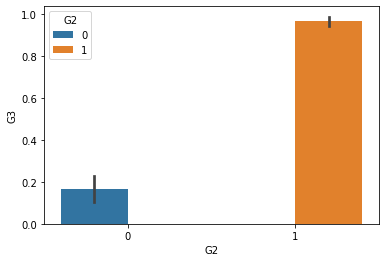

In [63]:
sns.barplot(studentNew_df['G2'],studentNew_df['G3'],hue=studentNew_df['G2'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

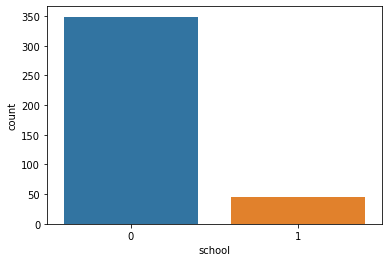

In [69]:
#No. of students in each school
sns.countplot(x="school", data=studentNew_df)

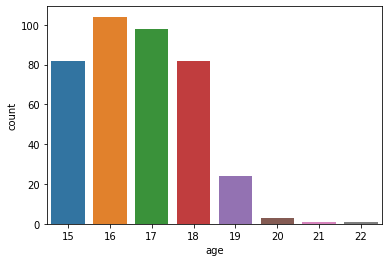

In [70]:
#No. of students with different ages
sns.countplot(x="age", data=studentNew_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [76]:
train_size = 300
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
print("Training data",X_train.shape)
print("Testing data",X_test.shape)

Training data (300, 26)
Testing data (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:

print("Accuracy",model.score(X_test, y_test))
print("F1 score",metrics.f1_score(y_test,y_predict))

Accuracy 0.9052631578947369
F1 score 0.931297709923664


# Naive bayes with Iris data

### Import Iris.csv

In [128]:
from sklearn.naive_bayes import GaussianNB

In [110]:
Iris_df = pd.read_csv("Iris_NaiveBayes.csv")
Iris_df.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [111]:
Iris_df.isnull().values.any()

False

In [112]:
Iris_df.rename(columns={"Sepal Length (in cm)":"SepalLen",
                     "Sepal Width in (cm)":"SepalWidth",
                     "Petal length (in cm)":"PetalLen",
                     "Petal width (in cm)":"PetalWidth"},inplace=True)
Iris_df

,SepalLen,SepalWidth,PetalLen,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [113]:
Iris_df.dtypes

SepalLen      float64
SepalWidth    float64
PetalLen      float64
PetalWidth    float64
Class          object
dtype: object

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [114]:
X = Iris_df.iloc[:,0:4]
Y = Iris_df.iloc[:,4]

### Find the distribution of target variable (Class)

In [115]:
Iris_df.groupby(['Class']).size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Plot the distribution of target variable using histogram

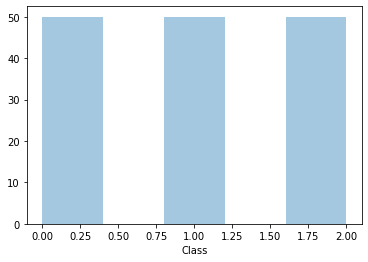

In [116]:
IrisNew_df = Iris_df
IrisNew_df['Class'] = le.fit_transform(IrisNew_df['Class'])
sns.distplot(IrisNew_df['Class'], kde=False,bins = 5);

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [117]:
Iris_df.dtypes

SepalLen      float64
SepalWidth    float64
PetalLen      float64
PetalWidth    float64
Class           int32
dtype: object

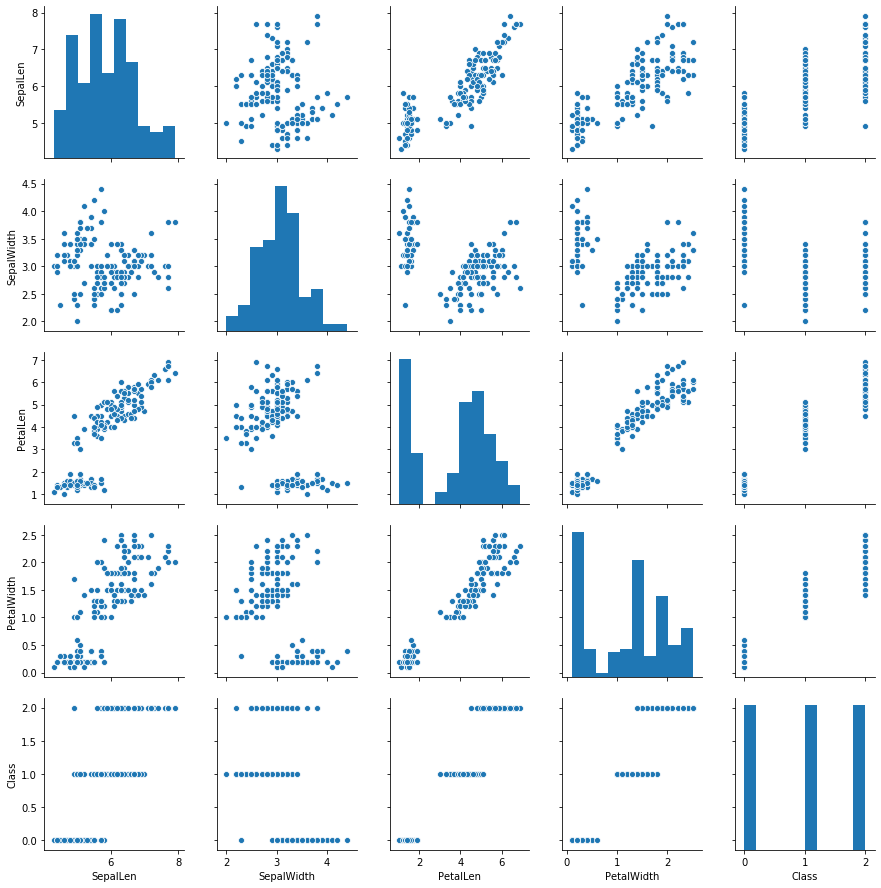

In [136]:
sns.pairplot(Iris_df)

In [139]:
print("PetalWidth and PetalLen are strongly correlated. Sepal width is normally distributed")

PetalWidth and PetalLen are strongly correlated. Sepal width is normally distributed


### Summary Statistics and explain insights for at least 2 variables

In [137]:
#Summary stats
Iris_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLen,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLen,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


SepalWidth is normally distributed.
PetalLen has skewed distribution.

### Correlation among all variables and give your insights

In [141]:
#Correlation among all variables
Iris_df.corr(method ='pearson') 

,SepalLen,SepalWidth,PetalLen,PetalWidth,Class
SepalLen,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLen,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


Diagonal values are 1 as self correlation is 1.
Petal Length is strongly correlated with PetalWidth.
Class has positive correlations with SepalLength, Petal Length and PetalWidth.

### Split data in Training and Validation in 80:20

In [118]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [142]:
#Scaling data for improved performance
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

### Train and Fit NaiveBayes Model

In [143]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
y_predict = model.predict(X_test_scaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [145]:
print("Accuracy",model.score(X_test_scaled, y_test))

Accuracy 0.8666666666666667


In [151]:
print("Classification Report ::\n ",metrics.classification_report(y_test, y_predict))
print("Confusion Matrix::\n",metrics.confusion_matrix(y_test, y_predict))

Classification Report ::
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.87        30
      macro avg       0.89      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

Confusion Matrix::
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]


Model is around 87% accurate.
Recall is > 0.5 which is pretty good.
Model has more correctly predicted Iris-setosa than others.